In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from google.colab import files

upload=files.upload()

data=pd.read_excel('txt2.xlsx')

Saving txt2.xlsx to txt2.xlsx


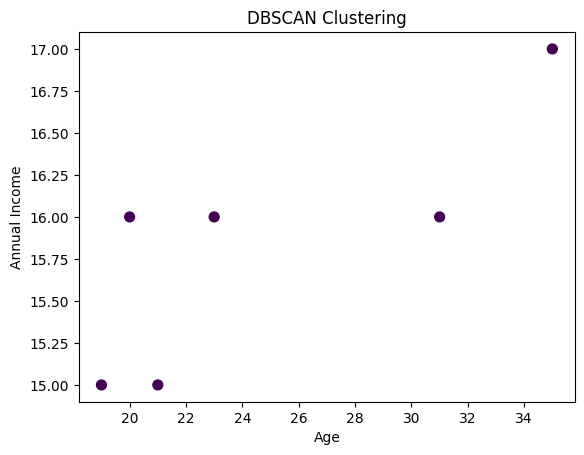

In [7]:
# Assuming your data has numerical features to perform clustering
# Select the columns containing features for clustering

feature_columns = ['Age', 'Annual Income']  # Replace with your column names

# Extract the selected features from the DataFrame
X = data[feature_columns].values

# DBSCAN algorithm implementation
def dbscan_clustering(data, epsilon, min_samples):
    clusters = np.zeros(len(data), dtype=int)
    cluster_label = 0

    # Iterate through each data point
    for idx, point in enumerate(data):
        # Check if the data point is already assigned to a cluster
        if clusters[idx] != 0:
            continue

        # Find neighbors within epsilon distance
        neighbors = []
        for neighbor_idx, neighbor_point in enumerate(data):
            if np.linalg.norm(point - neighbor_point) <= epsilon:     # Euclids Distance
                neighbors.append(neighbor_idx)

        # Check if the number of neighbors satisfies min_samples criteria
        if len(neighbors) < min_samples:
            clusters[idx] = -1  # Mark as noise (cluster label -1)
        else:
            cluster_label += 1
            clusters[idx] = cluster_label   # Assign cluster label to the current point

            # Expand the cluster
            for neighbor_idx in neighbors:
                if clusters[neighbor_idx] == -1:  # Update noise points to border points
                    clusters[neighbor_idx] = cluster_label
                elif clusters[neighbor_idx] == 0:  # Assign cluster label to unassigned neighbors
                    clusters[neighbor_idx] = cluster_label
                    new_neighbors = []
                    for new_neighbor_idx, new_neighbor_point in enumerate(data):
                        if np.linalg.norm(new_neighbor_point - data[neighbor_idx]) <= epsilon:
                            new_neighbors.append(new_neighbor_idx)
                    if len(new_neighbors) >= min_samples:
                        neighbors.extend(new_neighbors)

    return clusters

# DBSCAN parameters (epsilon and min_samples)

epsilon = 1.9  # Adjust as needed
min_samples = 4  # Adjust as needed

# Perform DBSCAN clustering

clusters = dbscan_clustering(X, epsilon, min_samples)

# Visualize the clusters (assuming 2D data for visualization)

plt.scatter(X[:, 0], X[:, 1], c=clusters, s=50)
plt.title('DBSCAN Clustering')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()
